## This notebook demonstrates various dimensionality reduction techniques and how the data changes on applying each.
### The dataset used is the `8x8 MNIST dataset`.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import (PCA, IncrementalPCA, KernelPCA, SparsePCA,
                                   TruncatedSVD, FastICA, MiniBatchDictionaryLearning)

from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

import warnings
warnings.filterwarnings('ignore')

## Load and preprocess the dataset.

In [3]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

#Parameters.
dim = len(X[0]) #64 
n_classes = len(np.unique(y))

n_neighbors = 3
random_state = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, 
                                                    stratify = y, random_state = random_state)

## Define dimensionality techniques to be used.

### PCA.
Principal component analysis is a statistical method that uses the process of linear, orthogonal transformation to transform a higher-dimensional set of features that could be possibly correlated into a lower-dimensional set of linearly uncorrelated features. These transformed and newly created features are also known as `Principal Components` or `PCs`.

In [4]:
pca = make_pipeline(StandardScaler(), 
                    PCA(n_components = 2, 
                        random_state=random_state))

### Incremental PCA.

`Incremental principal component analysis` is a variant of PCA that keeps the most significant singular vectors to project the data into a space to reduce size.

In [5]:
inc_pca = make_pipeline(StandardScaler(), 
                        IncrementalPCA(n_components = 2))

### Kernel PCA.
`KPCA` makes it possible to perform complex non-linear projections for dimensionality reduction.

In [6]:
# kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”

kpca = make_pipeline(StandardScaler(), 
                     KernelPCA(kernel = 'cosine', n_components = 2, 
                               gamma = None, #Kernel coefficient for rbf, poly and sigmoid kernels.
                               fit_inverse_transform = True, 
                               random_state = random_state, 
                               n_jobs = 7))

## Sparse PCA.
`Sparse PCA` uses the links between the ACP and SVD to extract the main components by solvin a lower-order matrix approximation problem.

In [7]:
sparsepca = make_pipeline(StandardScaler(), 
                          SparsePCA(n_components = 2, #Number of sparse atoms to extract
                                    alpha = 0.0001, #Sparsity controlling parameter.
                                    random_state = random_state, 
                                    n_jobs = 7))

## Singular value decomposition.

In [8]:
SVD = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2, #Desired dimensionality of the data
                                                   algorithm = 'randomized',
                                                   random_state=random_state, 
                                                   n_iter = 7))

## Gaussian random projection.
In the random projection, data wth very large dimension `d` are projected in a 2D space `kd` with a random matrix.

In [9]:
GRP = make_pipeline(StandardScaler(), 
                    GaussianRandomProjection(n_components = 2, 
                                             eps = 0.5, #Parameter to control the quality of the embedding.
                                             random_state = random_state))

## Linear Discriminant Analysis.
`LDA` is a classifier with a linear decision boundary generated by fitting class conditional densities to the data using `Bayes' rule.`

In [10]:
lda = make_pipeline(StandardScaler(), 
                    LinearDiscriminantAnalysis(n_components = 2))

## Neighborhood Components Analysis.
`NCA` is an algorithm for metric learning. It learns a linear transformation in a supervised fashion to improve the classification accuracy of a stochastic nearest neighbors riule in the transformed space.

In [11]:
nca = make_pipeline(StandardScaler(), 
                    NeighborhoodComponentsAnalysis(n_components = 2, 
                                                   random_state = random_state))

## Sparse Random Projection.

In [12]:
SRP = make_pipeline(StandardScaler(), 
                    SparseRandomProjection(n_components = 2, 
                                           density = 'auto',
                                           eps = 0.5, #Parameter to control the quality of the embedding. 
                                           #Smaller values lead to better embedding and higher number of dimensions in the target projection space.
                                           random_state = random_state, 
                                           dense_output = False))


## ISOMAP
It is a non-linear dimensionality reduction technique method based on spectral theory that attempts to preserve `geodetic distances` in the lower dimension.

In [13]:
isomap = make_pipeline(StandardScaler(), 
                       Isomap(n_components = 2, 
                              n_jobs = 7, 
                              n_neighbors = 5))

## MiniBatch dictionary learning.
It solves a problem of matrix factorization which amounts to finding a dictionary that can give good results under the condition of parsimony of the code.

In [14]:
miniBatchDictLearing = make_pipeline(StandardScaler(), 
                                     MiniBatchDictionaryLearning(n_components = 2, 
                                                                 batch_size = 200,  #Number of samples in each mini-batch
                                                                 alpha = 1, #Sparsity controlling parameter.
                                                                 n_iter = 25, 
                                                                 random_state = random_state))

## Independent Component analysis.
`ICA` is a method used for signal processing to linearly separate mixed data.

In [15]:
FastICA = make_pipeline(StandardScaler(),
                        FastICA(n_components = 2, 
                                algorithm = 'parallel', #Apply parallel or deflational algorithm for FastICA.
                                whiten = True, 
                                max_iter = 100, 
                                random_state = random_state))

## Locally Linear Embedding.
`LLE` works by first measuring how each training instance linearly relates to its closest neighbors and then looks for a low-dimensional representation of the training set where these local relationships are best preserved.

In [16]:
lle = make_pipeline(StandardScaler(), 
                    LocallyLinearEmbedding(n_components = 2, 
                                           n_neighbors = 10, #number of neighbors considered for each point.
                                           method = 'modified',
                                           n_jobs = 7,
                                           random_state=random_state))

# Use a neasest neighbor classifier to evaluate the methods.

In [17]:
knn = KNeighborsClassifier(n_neighbors = n_neighbors)

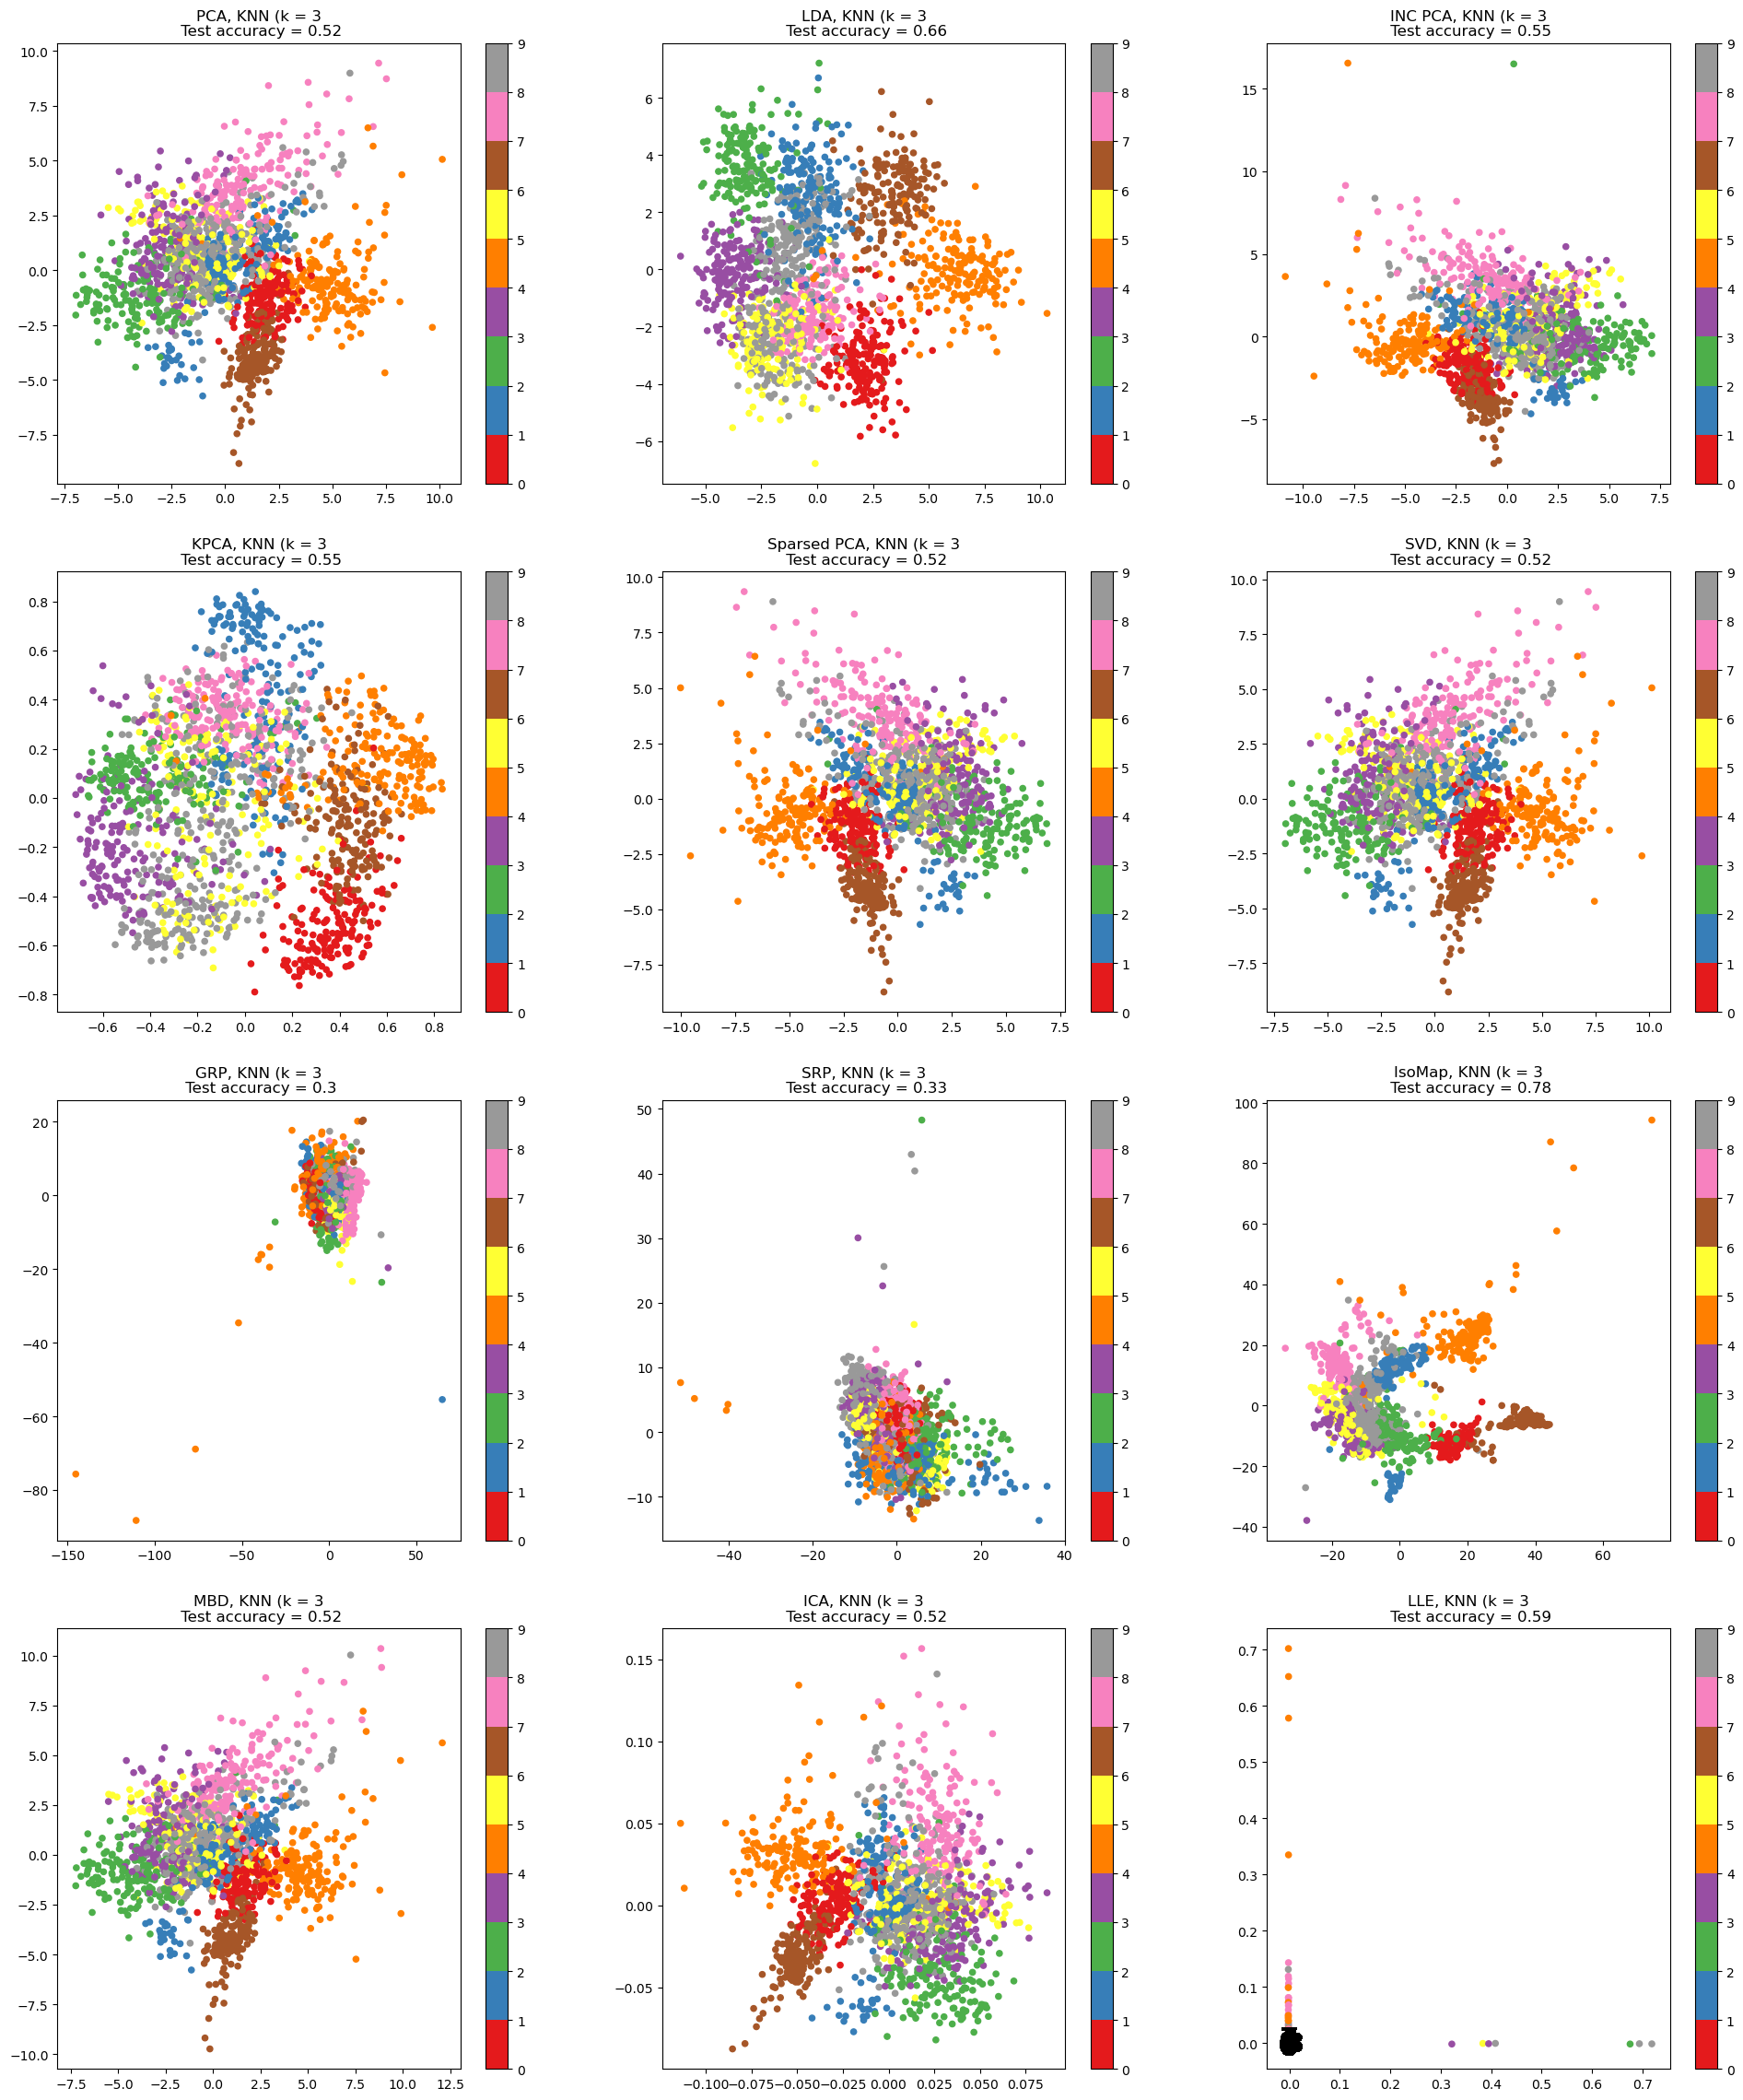

In [18]:
#Make a dictionary of the methods to be compared.
dim_reduction_methods = {'PCA': pca, 
                         'LDA':lda, 
                         'INC PCA': inc_pca, 
                         'KPCA': kpca,
                         'Sparsed PCA': sparsepca,
                         'SVD': SVD, 
                         'GRP': GRP,
                         'SRP': SRP,
                         'IsoMap': isomap, 
                         'MBD': miniBatchDictLearing,
                         'ICA': FastICA,
                         'LLE': lle}

plt.figure(figsize = (24, 36))
for j, (name, model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(5, 3, j + 1, aspect = 'auto')
    
    #Fit the method's model.
    model.fit(X_train, y_train)
    
    #Fit a nearest neighbor classifier on the embedded training set.
    knn.fit(model.transform(X_train), y_train)
    
    #Compute nearest neighbor accurcy on the embedded test set.
    acc_knn = knn.score(model.transform(X_test), y_test)
    
    #Fit the methods using the fitted model.
    X_embedded = model.transform(X)
    
    #Create a dataframe to easily plot the sample label.
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis = 1))
    
    #Plot the projected points and show the evaluation score.
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y, s = 20, cmap = 'Set1')
    plt.title(f'{name}, KNN (k = {n_neighbors}\n Test accuracy = {round(acc_knn, 2)}')
    plt.colorbar()
    

#Label the data distributions.
for i, number in enumerate(y_test):
    plt.annotate(number, 
                 df.loc[df[2] == number, [0, 1]].mean(),
                 horizontalalignment = 'center', 
                 verticalalignment = 'center', 
                 weight = 'bold', 
                 size = '20')
plt.show()

### Notebook reference can be found [here.](https://www.kaggle.com/code/ljlbarbosa/dimensionality-reduction-in-python/notebook)